In [38]:
import random
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor, XGBClassifier
from sklearn.pipeline import make_pipeline
import shap

In [2]:
features, target = load_breast_cancer(return_X_y=True, as_frame=True)
features, target

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  mean conca

In [3]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, stratify=target, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [4]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [5]:
explainer = shap.Explainer(pipe.predict_proba, X_train)
explainer

In [6]:
j = 15
explainer_ex = shap.Explainer(pipe.predict_proba, X_train)
shap_values_ex = explainer_ex(X_test)
shap_values_ex

.values =
array([[[ 0.02309165, -0.02309165],
        [ 0.02498689, -0.02498689],
        [ 0.02819946, -0.02819946],
        ...,
        [ 0.04315129, -0.04315129],
        [ 0.00650528, -0.00650528],
        [ 0.01208186, -0.01208186]],

       [[-0.00651525,  0.00651525],
        [ 0.04243852, -0.04243852],
        [-0.00637074,  0.00637074],
        ...,
        [-0.0235603 ,  0.0235603 ],
        [-0.06569746,  0.06569746],
        [-0.00239729,  0.00239729]],

       [[-0.01117758,  0.01117758],
        [ 0.00543119, -0.00543119],
        [-0.01272588,  0.01272588],
        ...,
        [-0.03460548,  0.03460548],
        [-0.02953799,  0.02953799],
        [-0.0138869 ,  0.0138869 ]],

       ...,

       [[-0.00313517,  0.00313517],
        [-0.01135774,  0.01135774],
        [-0.00751491,  0.00751491],
        ...,
        [-0.04113635,  0.04113635],
        [-0.01680324,  0.01680324],
        [-0.01312955,  0.01312955]],

       [[-0.00685145,  0.00685145],
        [ 0.00800

In [7]:
shap_values_ex[:, :, 0]

.values =
array([[ 0.02309165,  0.02498689,  0.02819946, ...,  0.04315129,
         0.00650528,  0.01208186],
       [-0.00651525,  0.04243852, -0.00637074, ..., -0.0235603 ,
        -0.06569746, -0.00239729],
       [-0.01117758,  0.00543119, -0.01272588, ..., -0.03460548,
        -0.02953799, -0.0138869 ],
       ...,
       [-0.00313517, -0.01135774, -0.00751491, ..., -0.04113635,
        -0.01680324, -0.01312955],
       [-0.00685145,  0.00800856, -0.0029103 , ...,  0.06359003,
         0.28784841,  0.14252404],
       [ 0.00976821,  0.03595288,  0.01784135, ...,  0.04107295,
         0.09727881,  0.05581875]])

.base_values =
array([0.35138115, 0.35138115, 0.35138115, 0.35138115, 0.35138115,
       0.35138115, 0.35138115, 0.35138115, 0.35138115, 0.35138115,
       0.35138115, 0.35138115, 0.35138115, 0.35138115, 0.35138115,
       0.35138115, 0.35138115, 0.35138115, 0.35138115, 0.35138115,
       0.35138115, 0.35138115, 0.35138115, 0.35138115, 0.35138115,
       0.35138115, 0.35138

In [8]:
shap_values_ex[:, :, 0].values.shape

(171, 30)

In [9]:
X_test, shap_values_ex[:, :, 0].data

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 256        19.55         28.77          133.60     1207.0          0.09260   
 560        14.05         27.15           91.38      600.4          0.09929   
 299        10.51         23.09           66.85      334.2          0.10150   
 343        19.68         21.68          129.90     1194.0          0.09797   
 131        15.46         19.48          101.70      748.9          0.10920   
 ..           ...           ...             ...        ...              ...   
 174        10.66         15.15           67.49      349.6          0.08792   
 321        20.16         19.66          131.10     1274.0          0.08020   
 270        14.29         16.82           90.30      632.6          0.06429   
 3          11.42         20.38           77.58      386.1          0.14250   
 15         14.54         27.54           96.73      658.8          0.11390   
 
      mean compactness  mean concavity  mean conca

In [10]:
explanation = explainer_ex(X_test)
shap.initjs()
shap.force_plot(base_value=explanation.base_values[0][0], shap_values=explanation.values[0][:, 0], features=X_test.columns)

In [11]:
shap.force_plot(explanation[0, :, 0])

In [12]:
from IPython.display import display

# 설명 객체는 미리 계산
explanation = explainer(X_test)

# 0번부터 4번까지, 5개 표본에 대해 반복문으로 force_plot을 하나씩 호출
print("5개 표본에 대한 Force Plot을 순서대로 출력합니다.")
for i in range(5):
    print(f"\n--- Sample {i}에 대한 설명 ---")
    # display() 함수를 사용해야 jupyter notebook에서 각 플롯이 잘 그려집니다.
    display(shap.force_plot(explanation[i, :, 0]))

5개 표본에 대한 Force Plot을 순서대로 출력합니다.

--- Sample 0에 대한 설명 ---



--- Sample 1에 대한 설명 ---



--- Sample 2에 대한 설명 ---



--- Sample 3에 대한 설명 ---



--- Sample 4에 대한 설명 ---


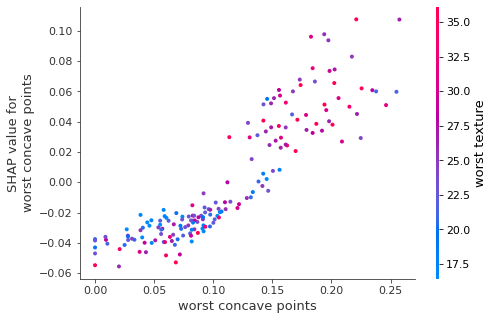

In [13]:
shap.dependence_plot(ind='worst concave points', shap_values=explanation.values[:, :, 0], features=X_test, interaction_index='auto')

In [14]:
explanation

.values =
array([[[ 0.02283939, -0.02283939],
        [ 0.03138429, -0.03138429],
        [ 0.02554948, -0.02554948],
        ...,
        [ 0.0512451 , -0.0512451 ],
        [ 0.00519236, -0.00519236],
        [ 0.01504542, -0.01504542]],

       [[-0.00640704,  0.00640704],
        [ 0.04316165, -0.04316165],
        [-0.00656309,  0.00656309],
        ...,
        [-0.0232582 ,  0.0232582 ],
        [-0.05884308,  0.05884308],
        [-0.00205378,  0.00205378]],

       [[-0.02045584,  0.02045584],
        [ 0.00579673, -0.00579673],
        [-0.0210117 ,  0.0210117 ],
        ...,
        [-0.03725596,  0.03725596],
        [-0.02543291,  0.02543291],
        [-0.01028279,  0.01028279]],

       ...,

       [[-0.00586266,  0.00586266],
        [-0.00917091,  0.00917091],
        [-0.00595622,  0.00595622],
        ...,
        [-0.03794529,  0.03794529],
        [-0.02242633,  0.02242633],
        [-0.01854015,  0.01854015]],

       [[-0.00690906,  0.00690906],
        [ 0.01183

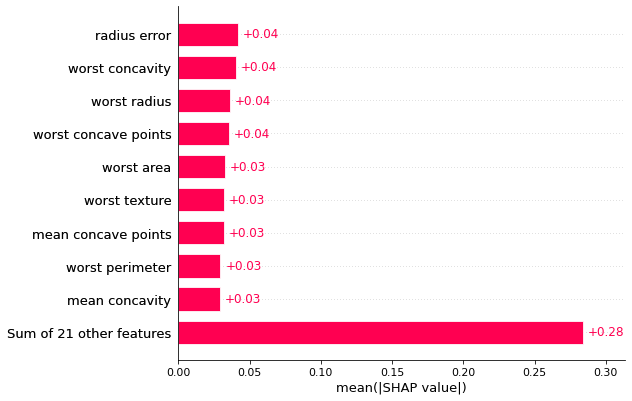

In [15]:
shap.plots.bar(explanation[:, :, 0])

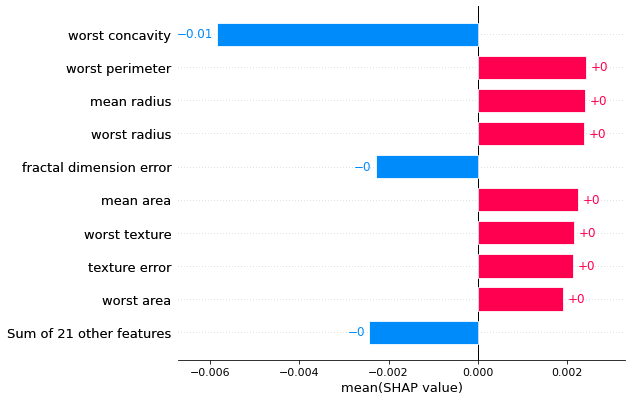

In [16]:
shap.plots.bar(explanation[:, :, 0].mean(axis=0))

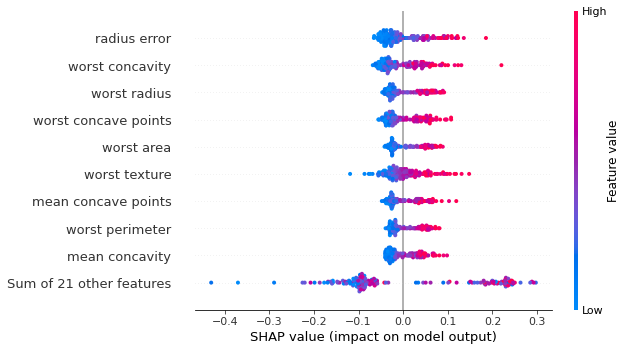

In [17]:
shap.plots.beeswarm(explanation[:, :, 0])

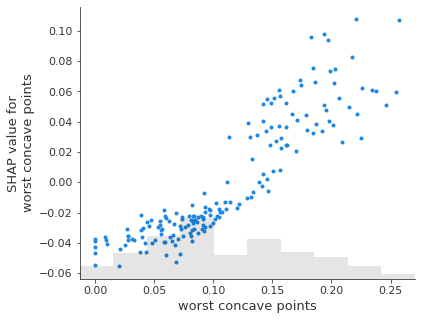

In [18]:
shap.plots.scatter(explanation[:, 'worst concave points', 0])

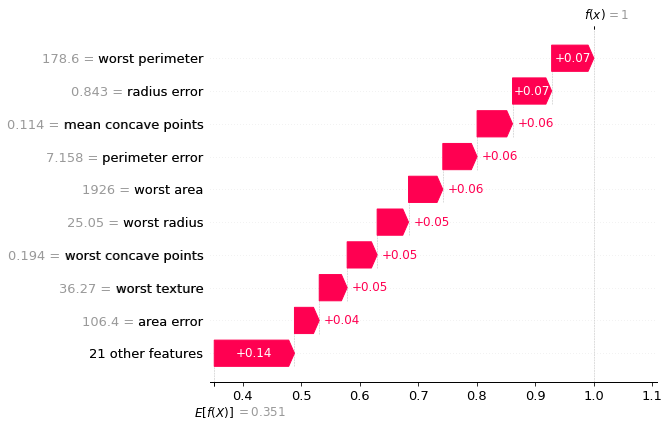

In [19]:
shap.plots.waterfall(explanation[0, :, 0])

In [20]:
dataset = fetch_california_housing(as_frame=True)
X = dataset['data']
y = dataset['target']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
xgb = XGBRegressor(max_depth=3, n_estimator=5000, eta=0.8).fit(X_train, y_train)
xgb.score(X_train, y_train), xgb.score(X_test, y_test)

(0.8724497290967345, 0.8285842441627855)

In [27]:
explainer = shap.Explainer(xgb)
explanation = explainer(X_test, check_additivity=False)

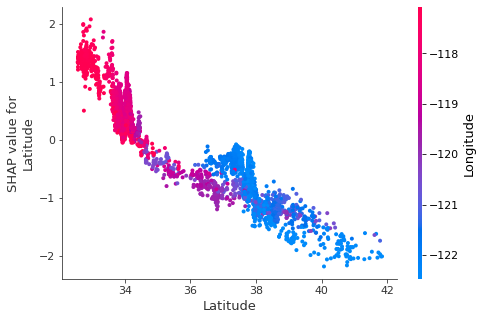

In [28]:
shap.dependence_plot(ind='Latitude', shap_values=explanation.values, features=X_test, interaction_index='auto')

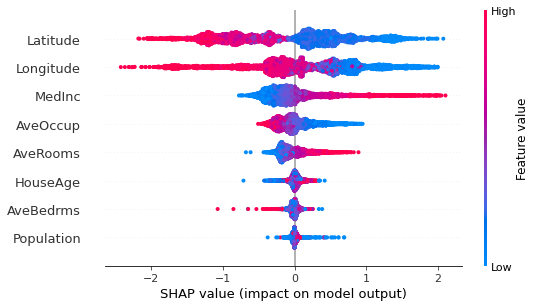

In [29]:
shap.plots.beeswarm(explanation)

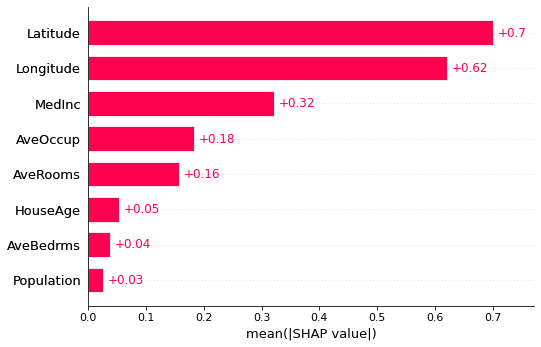

In [30]:
shap.plots.bar(explanation)

In [32]:
explanation.values.shape

(4128, 8)

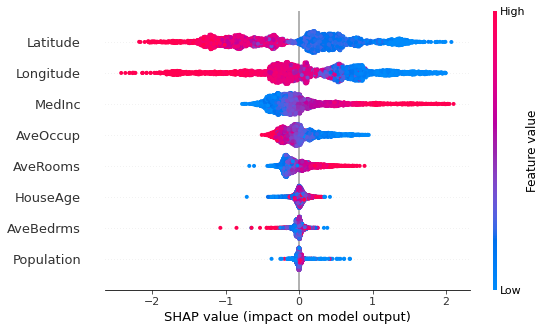

In [33]:
shap.summary_plot(explanation, features=X_test)

In [36]:
X, y = shap.datasets.adult()
X_display, y_display = shap.datasets.adult(display=True)
X_display, X

(        Age          Workclass  Education-Num       Marital Status  \
 0      39.0          State-gov           13.0        Never-married   
 1      50.0   Self-emp-not-inc           13.0   Married-civ-spouse   
 2      38.0            Private            9.0             Divorced   
 3      53.0            Private            7.0   Married-civ-spouse   
 4      28.0            Private           13.0   Married-civ-spouse   
 ...     ...                ...            ...                  ...   
 32556  27.0            Private           12.0   Married-civ-spouse   
 32557  40.0            Private            9.0   Married-civ-spouse   
 32558  58.0            Private            9.0              Widowed   
 32559  22.0            Private            9.0        Never-married   
 32560  52.0       Self-emp-inc            9.0   Married-civ-spouse   
 
                Occupation    Relationship    Race      Sex  Capital Gain  \
 0            Adm-clerical   Not-in-family   White     Male        21

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [52]:
xgb = XGBClassifier(max_depth=3, n_estimators=1000, eta=0.1, reg_alpha=0.5)
xgb.fit(X_train, y_train)
xgb.score(X_train, y_train), xgb.score(X_test, y_test)

(0.887093058968059, 0.8765545831414094)

In [54]:
explainer = shap.Explainer(model=xgb)
explanation = explainer(X_test)
shap_values = explanation.values
explanation

.values =
array([[ 4.42822538e-02,  6.14688098e-02, -1.04825273e-01, ...,
        -9.61489230e-02, -1.83564961e-01,  8.65025166e-03],
       [ 6.67810142e-01,  4.93298054e-01,  5.56441247e-01, ...,
        -4.97669205e-02,  8.25428009e-01,  1.12723559e-02],
       [-1.96976089e+00,  3.43849580e-03, -5.72322793e-02, ...,
        -8.56718644e-02, -2.55625457e-01,  4.24209330e-03],
       ...,
       [-4.19424963e+00, -6.75482005e-02, -3.87006290e-02, ...,
        -5.69976717e-02, -1.58234847e+00, -7.54650508e-04],
       [-1.73683572e+00, -1.20867744e-01, -4.63961393e-01, ...,
        -6.45508245e-02, -1.93727747e-01, -7.68136024e-01],
       [ 5.09202659e-01,  5.34158647e-02,  5.20822499e-03, ...,
        -8.40079710e-02, -5.30806184e-02,  1.96739770e-02]], dtype=float32)

.base_values =
array([-1.1866056, -1.1866056, -1.1866056, ..., -1.1866056, -1.1866056,
       -1.1866056], dtype=float32)

.data =
array([[ 39.,   4.,  10., ..., 625.,  40.,  39.],
       [ 48.,   1.,  13., ...,   0.,

In [55]:
shap_values.shape

(6513, 12)

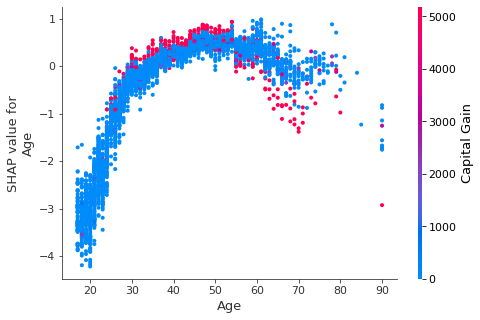

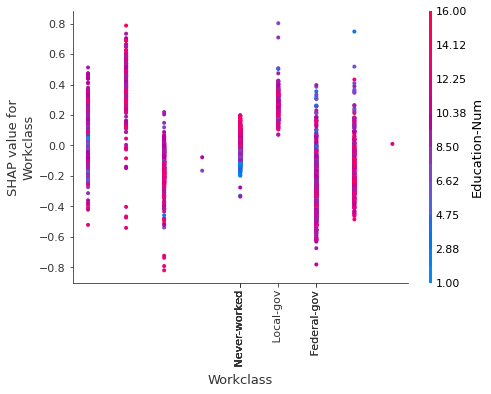

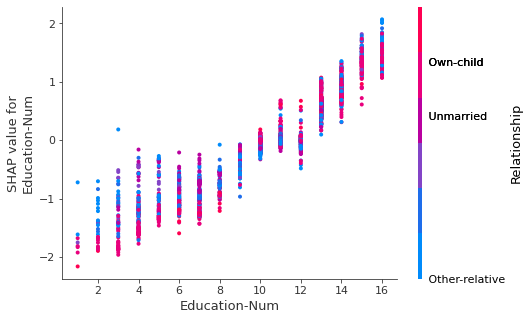

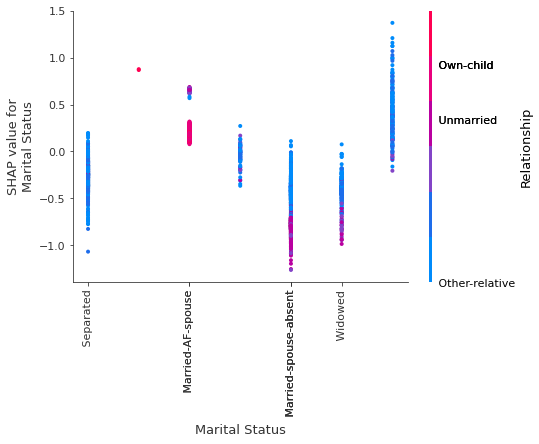

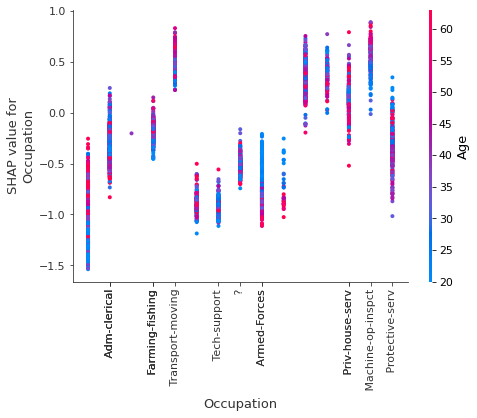

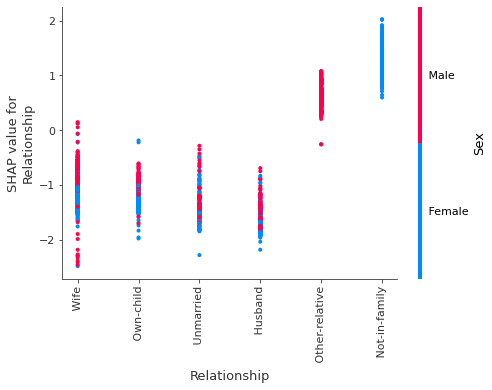

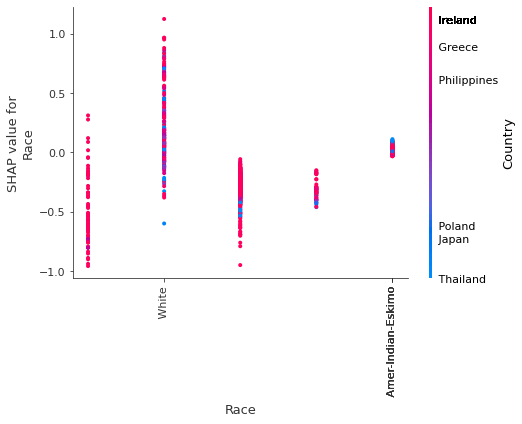

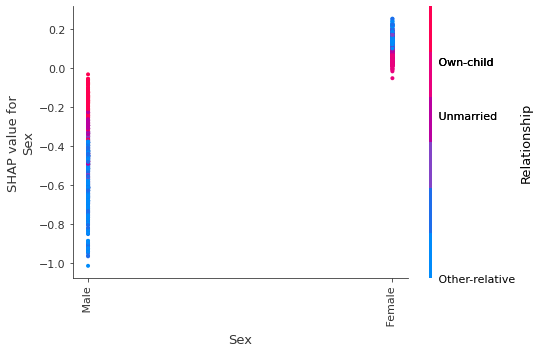

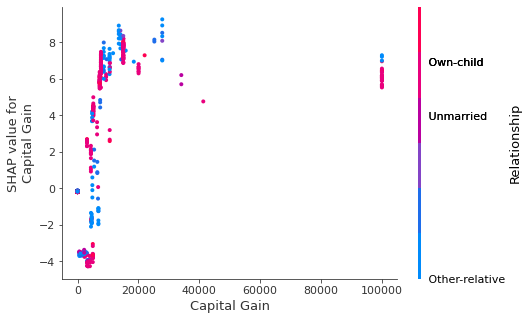

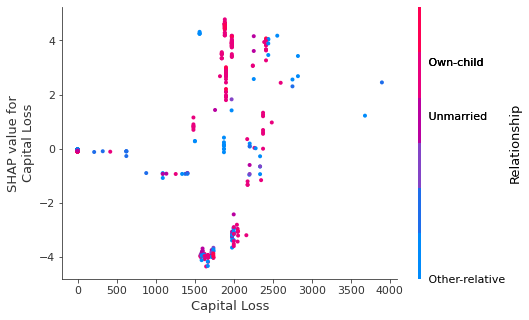

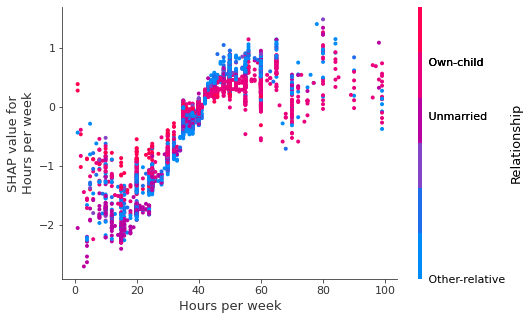

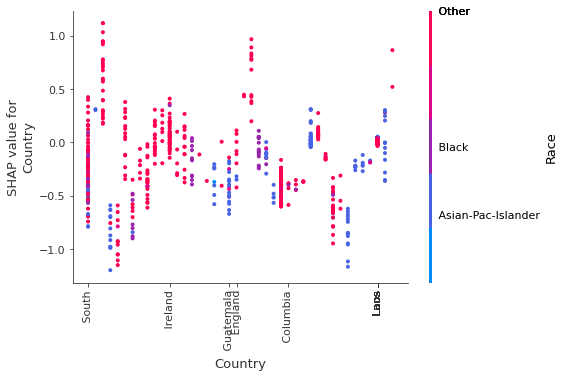

In [57]:
for name in X_train.columns:
    shap.dependence_plot(ind=name, shap_values=shap_values, features=X_test, interaction_index='auto', display_features=X_display)